In [1]:
#Emoji Prediction using LSTM
import pandas as pd
import numpy as np


In [2]:
# load the train data:

train_data = pd.read_csv('train_emoji.csv', header=None)
train_data.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [3]:
# Load the test data:

test_data = pd.read_csv('test_emoji.csv', header= None)
test_data.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [4]:
# drop columns 2 and 3 from our train data:

train_data.drop(labels = [2,3], axis = 1, inplace = True)
train_data.head()

,0,1
0,never talk to me again,3
1,I am proud of your achievements,2
2,It is the worst day in my life,3
3,Miss you so much,0
4,food is life,4


In [5]:
!pip install --upgrade emoji


In [6]:
import emoji
print(emoji.__version__)

2.14.1


In [7]:
# import emoji
# emoji.EMOJI_UNICODE['en']

import emoji

# Convert text to emoji
print(emoji.emojize(":grinning_face_with_big_eyes:"))  

# Check if a character is an emoji
print(emoji.is_emoji("😊"))  # True

😃
True


In [8]:
emoji.emojize(':Virgo')

':Virgo'

In [9]:
emoji_dict = {
    '0' : ':beating_heart:',
    '1' : ':baseball:',
    '2' : ':face_with_tears_of_joy:',
    '3' : ':confounded_face:',
    '4' : ':face_savoring_food:'
}

In [10]:
for e in emoji_dict.values():
    print(emoji.emojize(e), end = ' ')

💓 ⚾ 😂 😖 😋 

In [11]:
# pre processing:

X_train = train_data[0].values
Y_train = train_data[1].values

In [12]:
X_train[:10]

array(['never talk to me again', 'I am proud of your achievements',
       'It is the worst day in my life', 'Miss you so much',
       'food is life', 'I love you mum', 'Stop saying bullshit',
       'congratulations on your acceptance',
       'The assignment is too long ', 'I want to go play'], dtype=object)

In [13]:
Y_train[:10]

array([3, 2, 3, 0, 4, 0, 3, 2, 3, 1], dtype=int64)

In [14]:
X_train.shape , Y_train.shape

((132,), (132,))

In [15]:
# We are embedding the text as we are going to create RNN model:

f = open('glove.6B.50d.txt' , encoding = 'utf8', mode = 'r')

In [16]:
embedding_matrix = {}

In [17]:
for line in f:
    values = line.split()
    word = values[0]
    emb = np.array(values[1:], dtype = 'float')
    
    embedding_matrix[word] = emb

In [18]:
#embedding_matrix

In [19]:
# We will create a function which will give embedding of our text data:

def get_embedding_matrix_for_data(data):
    max_len = 10
    embedding_data = np.zeros( (len(data), max_len, 50))
    
    for x in range(data.shape[0]):
        word_in_sen = data[x].split()
        
        for y in range(len(word_in_sen)):
            if embedding_matrix.get(word_in_sen[y].lower()) is not None:
                embedding_data[x][y] = embedding_matrix[word_in_sen[y].lower()]
                
    return embedding_data
                
                

In [20]:
X_train = get_embedding_matrix_for_data(X_train)

In [21]:
X_train.shape

#132 text samples 
#Each text sample is represented by a sequence of 10 words.
#word is represented by a 50-dimensional vector


(132, 10, 50)

In [22]:
#!pip install tensorflow

In [23]:
# covert the output to categorical:

import tensorflow
from tensorflow.keras.utils import to_categorical


In [24]:
Y_train = to_categorical(Y_train)

In [25]:
Y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0.

In [26]:
# Create Model:

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN, LSTM, Activation

In [27]:
# build our model:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create a Sequential model
model = Sequential()

# Use the Input layer to specify input shape
model.add(Input(shape=(10, 50)))  # Specify the input shape here (sequence length 10, embedding dimension 50)

# Add Bidirectional LSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))

# Add another LSTM layer
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.3))

# Output layer with softmax activation
model.add(Dense(5, activation='softmax'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 256)             │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 709,893 (2.71 MB)

 Trainable params: 709,893 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#model.summary()

In [29]:
model.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics= ['acc'])

In [30]:
# from gensim.models import KeyedVectors
# import numpy as np

# # Load pre-trained Word2Vec or GloVe embeddings
# word_vectors = KeyedVectors.load_word2vec_format("path/to/word2vec.bin", binary=True)  # If using Word2Vec

# embedding_matrix = np.zeros((vocab_size, embedding_dim))

# for word, i in tokenizer.word_index.items():
#     if word in word_vectors:
#         embedding_matrix[i] = word_vectors[word]

# # Use pre-trained embeddings in the model
# embedding_layer = Embedding(input_dim=vocab_size, 
#                             output_dim=embedding_dim, 
#                             weights=[embedding_matrix], 
#                             input_length=max_len, 
#                             trainable=False)


In [31]:
# history = model.fit(X_train, Y_train, 
#                     validation_split=0.2,  
#                     batch_size=64,          
#                     epochs=100,             
#                     callbacks=[early_stopping, lr_reduction] 
#                    )


In [32]:
# model training:

history = model.fit(X_train, Y_train, validation_split = 0.25, batch_size=32, epochs = 50 )

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - acc: 0.2220 - loss: 1.5998 - val_acc: 0.3636 - val_loss: 1.5524
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.4237 - loss: 1.4729 - val_acc: 0.4545 - val_loss: 1.4862
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.5205 - loss: 1.4085 - val_acc: 0.3333 - val_loss: 1.4515
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.3979 - loss: 1.3162 - val_acc: 0.3939 - val_loss: 1.3748
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.4406 - loss: 1.1965 - val_acc: 0.5152 - val_loss: 1.1565
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.5795 - loss: 1.0924 - val_acc: 0.5455 - val_loss: 1.1014
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.5881 - loss: 0.9766 - val_acc: 0.6364 - val_loss: 1.0148
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - acc: 0.6872 - loss: 0.8548 - val_acc: 0.6970 - val_loss: 0.8591
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - acc: 0.6656 - loss: 0.7435 -

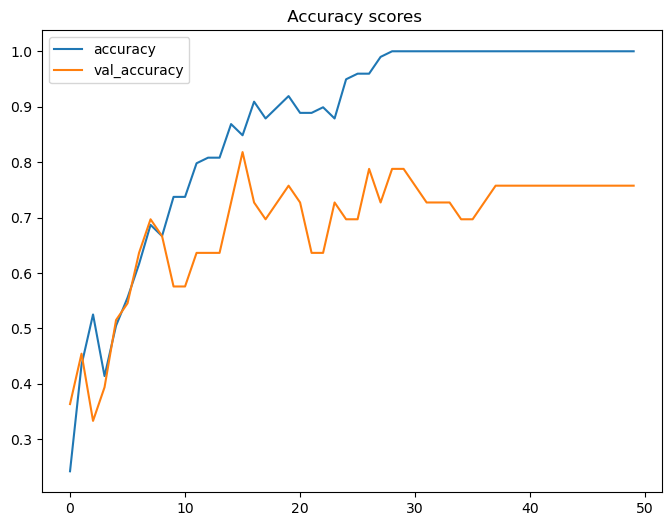

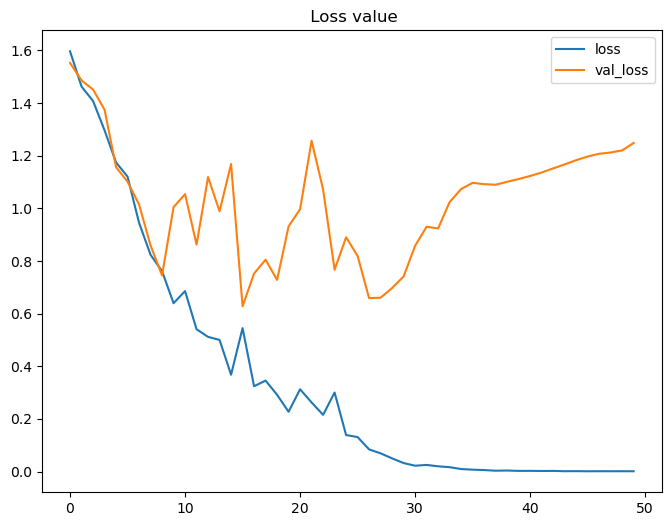

In [33]:
# plot acuuracy and loss graph:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title(' Accuracy scores')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title(' Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [34]:
model.evaluate(X_train, Y_train)[1]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9707 - loss: 0.1520    


0.939393937587738

In [35]:
# preparing test data:

test_data[0] = test_data[0].apply(lambda x: x[:-1])

X_test = test_data[0].values
Y_test = test_data[1].values

In [36]:
X_test = get_embedding_matrix_for_data(X_test)
Y_test = to_categorical(Y_test)

In [37]:
model.evaluate(X_test, Y_test)[1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.6146 - loss: 2.4470


0.625

In [38]:
# Make predictions
Y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display predictions and actual labels
for t in range(len(test_data)):
    print(test_data[0].iloc[t])
    print('Predictions: ', emoji.emojize(emoji_dict[str(Y_pred[t])]))
    print('Actual: ', emoji.emojize(emoji_dict[str(test_data[1].iloc[t])]))

    

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step
I want to eat
Predictions:  😋
Actual:  😋
he did not answer
Predictions:  😖
Actual:  😖
he got a raise
Predictions:  😂
Actual:  😂
she got me a present
Predictions:  😂
Actual:  💓
ha ha ha it was so funny
Predictions:  😂
Actual:  😂
he is a good friend
Predictions:  😂
Actual:  💓
I am upset
Predictions:  ⚾
Actual:  💓
We had such a lovely dinner tonight
Predictions:  😋
Actual:  💓
where is the food
Predictions:  😋
Actual:  😋
Stop making this joke ha ha ha
Predictions:  😂
Actual:  😂
where is the ball
Predictions:  ⚾
Actual:  ⚾
work is hard
Predictions:  😂
Actual:  😖
This girl is messing with me
Predictions:  💓
Actual:  😖
are you serious ha ha
Predictions:  😖
Actual:  😂
Let us go play baseball
Predictions:  ⚾
Actual:  ⚾
This stupid grader is not working 
Predictions:  😖
Actual:  😖
work is horrible
Predictions:  😖
Actual:  😖
Congratulation for having a baby
Predictions:  😂
Actual:  😂
stop messing around
Predictions:  😖
Actual:  😖
any suggestions for dinner
P